# Gabriele Ferrero

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Verifica su pandas e matplolib.pyplot

## Esercizio 1: espressioni facciali
Il file `faces.cs` contiene i dati di 2000 facce di diverse persone. Per ciascun faccia nel dataset è presente il tipo di espressione facciale e un'immagine dell'intero viso.
- la colonna *emotions* descrive il tipo di espressione facciale (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), 
- la colonna *pixels* contiene una immagine di 48x48pixel della espressione facciale. La colonna contiene i 2304=48x48 valori interi che rappresentano le intensità di grigio dei pixel dell'immagine.


1) Realizzare una sola figura nella quale per ogni tipo di espressione facciale siano visualizzate 5 facce scelte a caso tra quelle aventi quel tipo di espressione. Utilizzare la colormap più idonea.



In [114]:
faccie = pd.read_csv("faces.csv")
faccie

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
1995,0,91 115 65 53 99 78 68 90 41 31 70 97 116 129 1...
1996,2,68 48 60 66 53 47 63 77 107 117 95 95 153 201 ...
1997,5,253 253 254 247 171 144 133 145 114 74 90 111 ...
1998,0,26 26 25 25 26 26 26 28 26 27 36 61 77 72 79 7...


In [115]:
faccie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  2000 non-null   int64 
 1   pixels   2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [116]:
espressioni = ("Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral")

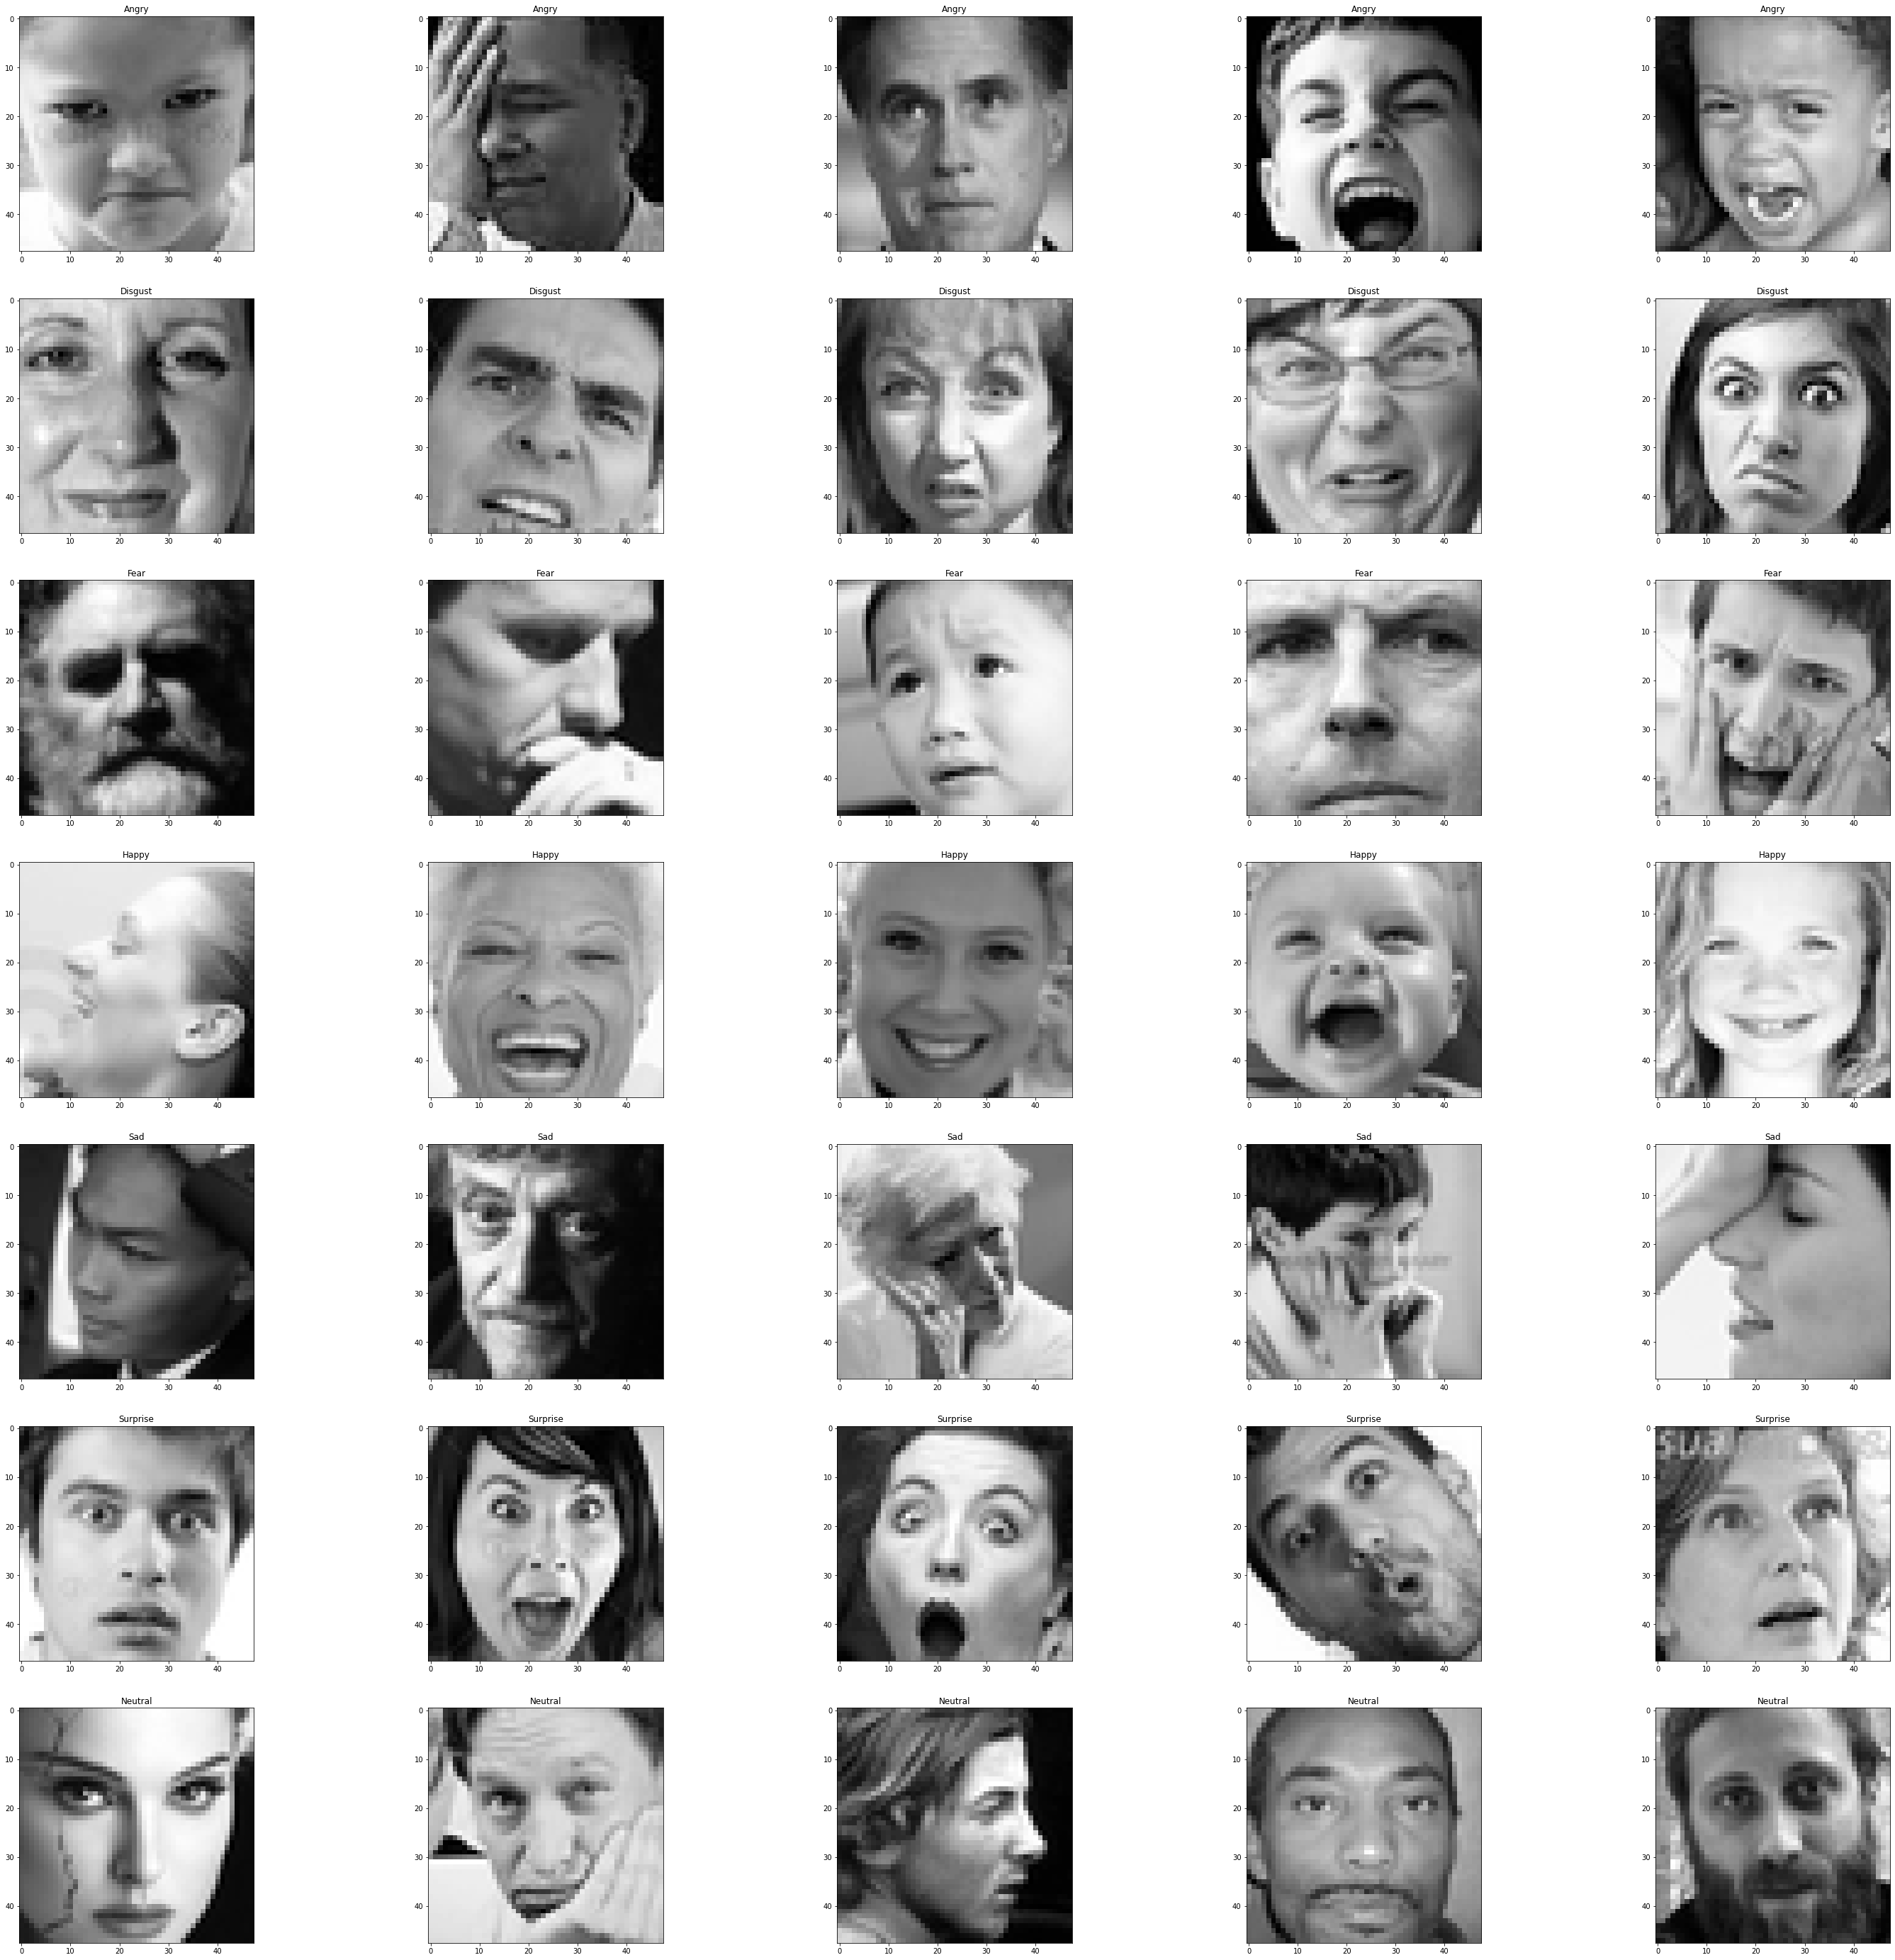

In [117]:
fig, axs = plt.subplots(nrows=len(espressioni), ncols=5,figsize=(50,50))

for i, espressione in enumerate(espressioni):
    for y in range(5):
        pixel_faccia = np.random.choice(faccie[faccie["emotion"]==i]["pixels"].values)
        narray = np.array(pixel_faccia.split(" "))
        narray = narray.astype(float)
        axs[i,y].imshow(narray.reshape((48,48)), cmap="gray")
        axs[i,y].set_title(espressione)
    
plt.show()
    

# Esercizio 2: Olimpiadi Invernali 2022
Il file `medals.csv` contiene tutte le medaglie assegnate sinora alle Olimpiadi Invernali 2022, mentre il file `athletes.csv` contiene tutti gli atleti iscritti alle Olimpiadi con alcune loro informazioni anagrafiche. Rispondi alle seguenti domande utilizzando pandas e matplotlip.

1) Nei due file sono presenti valori mancanti?

2) Quali sono i 5 paesi che hanno vinto più medaglie?

3) Rappresenta la distribuzione delle medaglie rispetto al loro tipo, per i 5 paesi del punto 1, mediante un grafico a barre.

4) Utilizza un histogramma o un diagramma a barre per rappresentare come gli atleti italiani sono suddivisi tra le diverse discipline a cui partecipano.

5) Aggrega i dati degli atleti per `country_code` e `discipline_code` in modo da visualizzare quanti atleti di ogni nazione partecipano in ogni disciplina: salva i dati su un file .csv.

6) **BONUS** C'è qualche atleta italiano nato a Milano che ha vinto una medaglia? In caso affermativo chi?



In [118]:
medaglie = pd.read_csv("medals.csv")
medaglie

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,event,country,country_code,discipline,discipline_code
0,Gold,1,2022-02-05 00:00:00.0,ECKHOFF T,ECKHOFF Tiril,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
1,Gold,1,2022-02-05 00:00:00.0,ROEISELAND MO,ROEISELAND Marte Olsbu,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
2,Gold,1,2022-02-05 00:00:00.0,BOE T,BOE Tarjei,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
3,Gold,1,2022-02-05 00:00:00.0,BOE JT,BOE Johannes Thingnes,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
4,Silver,2,2022-02-05 00:00:00.0,CHEVALIER-BOUCHET,CHEVALIER-BOUCHET Anais,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),France,FRA,Biathlon,BTH
...,...,...,...,...,...,...,...,...,...,...,...,...
443,Bronze,3,2022-02-16 00:00:00.0,DOTTI T,DOTTI Tommaso,M,../../../en/results/short-track-speed-skating/...,Men's 5000m Relay,Italy,ITA,Short Track Speed Skating,STK
444,Bronze,3,2022-02-16 00:00:00.0,SIGHEL P,SIGHEL Pietro,M,../../../en/results/short-track-speed-skating/...,Men's 5000m Relay,Italy,ITA,Short Track Speed Skating,STK
445,Gold,1,2022-02-16 00:00:00.0,CHOI M,CHOI Minjeong,W,../../../en/results/short-track-speed-skating/...,Women's 1500m,Republic of Korea,KOR,Short Track Speed Skating,STK
446,Silver,2,2022-02-16 00:00:00.0,FONTANA A,FONTANA Arianna,W,../../../en/results/short-track-speed-skating/...,Women's 1500m,Italy,ITA,Short Track Speed Skating,STK


In [119]:
medaglie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   medal_type          448 non-null    object
 1   medal_code          448 non-null    int64 
 2   medal_date          448 non-null    object
 3   athlete_short_name  448 non-null    object
 4   athlete_name        448 non-null    object
 5   athlete_sex         448 non-null    object
 6   athlete_link        448 non-null    object
 7   event               448 non-null    object
 8   country             448 non-null    object
 9   country_code        448 non-null    object
 10  discipline          448 non-null    object
 11  discipline_code     448 non-null    object
dtypes: int64(1), object(11)
memory usage: 42.1+ KB


In [120]:
atleti = pd.read_csv("athletes.csv")
atleti

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALTO Antti,AALTO A,Male,1995-04-02,KITEE,Finland,Finland,FIN,Ski Jumping,SJP,KUOPIO,Finland,NaN,../../../en/results/ski-jumping/athlete-profil...
1,AALTONEN Miro,AALTONEN M,Male,1993-06-07,JOENSUU,Finland,Finland,FIN,Ice Hockey,IHO,PODOLSK,Russian Federation,1.80/5'10'',../../../en/results/ice-hockey/athlete-profile...
2,ABDELKADER Justin,ABDELKADER J,Male,1987-02-25,NaN,NaN,United States of America,USA,Ice Hockey,IHO,NaN,NaN,1.87/6'1'',../../../en/results/ice-hockey/athlete-profile...
3,ABDI Fayik,ABDI F,Male,1997-10-07,"SAN DIEGO, CA",United States of America,Saudi Arabia,KSA,Alpine Skiing,ALP,DHAHRAN,Saudi Arabia,NaN,../../../en/results/alpine-skiing/athlete-prof...
4,ABDUL-SABOOR Hakeem,ABDUL-SABOOR H,Male,1987-11-07,"EAST ORANGE, NJ",United States of America,United States of America,USA,Bobsleigh,BOB,"POWHATAN, VA",United States of America,NaN,../../../en/results/bobsleigh/athlete-profile-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,ZUREK Damian,ZUREK D,Male,1999-09-17,TOMASZOW MAZOWIECKI,Poland,Poland,POL,Speed Skating,SSK,TOMASZOW MAZOWIECKI,Poland,1.82/5'11'',../../../en/results/speed-skating/athlete-prof...
2888,ZUYEVA Maryna,ZUYEVA M,Female,1992-03-20,MINSK,Belarus,Belarus,BLR,Speed Skating,SSK,MINSK,Belarus,1.79/5'10'',../../../en/results/speed-skating/athlete-prof...
2889,ZUZIN Peter,ZUZIN P,Male,1990-09-04,ZVOLEN,Slovakia,Slovakia,SVK,Ice Hockey,IHO,ZVOLEN,Slovakia,1.82/5'11'',../../../en/results/ice-hockey/athlete-profile...
2890,ZVEJNIEKS Miks,ZVEJNIEKS M,Male,1995-03-08,RIGA,Latvia,Latvia,LAT,Alpine Skiing,ALP,RIGA,Latvia,NaN,../../../en/results/alpine-skiing/athlete-prof...


In [121]:
atleti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2892 non-null   object
 1   short_name         2892 non-null   object
 2   gender             2892 non-null   object
 3   birth_date         2889 non-null   object
 4   birth_place        2621 non-null   object
 5   birth_country      2740 non-null   object
 6   country            2892 non-null   object
 7   country_code       2892 non-null   object
 8   discipline         2889 non-null   object
 9   discipline_code    2892 non-null   object
 10  residence_place    2445 non-null   object
 11  residence_country  2599 non-null   object
 12  height_m/ft        727 non-null    object
 13  url                2892 non-null   object
dtypes: object(14)
memory usage: 316.4+ KB


In [122]:
# Nel file medals.csv non sono presenti valori mancanti mentre nel file athletes.csv sono presenti valori mancanti

In [123]:
medaglie_vinte = medaglie["country"].value_counts()
medaglie_vinte

ROC                           52
Norway                        41
Germany                       38
United States of America      34
Canada                        30
Finland                       29
Italy                         25
Austria                       24
People's Republic of China    23
France                        23
Japan                         23
Sweden                        22
Netherlands                   20
Republic of Korea             14
Slovenia                      13
Switzerland                   10
Hungary                        7
Australia                      4
Latvia                         4
New Zealand                    2
Belarus                        2
Czech Republic                 2
Poland                         1
Ukraine                        1
Estonia                        1
Spain                          1
Slovakia                       1
Belgium                        1
Name: country, dtype: int64

In [124]:
top5 = medaglie_vinte.head(5)
top5

ROC                         52
Norway                      41
Germany                     38
United States of America    34
Canada                      30
Name: country, dtype: int64

In [125]:
top5_nome = list(dict(top5).keys())
top5_nome

['ROC', 'Norway', 'Germany', 'United States of America', 'Canada']

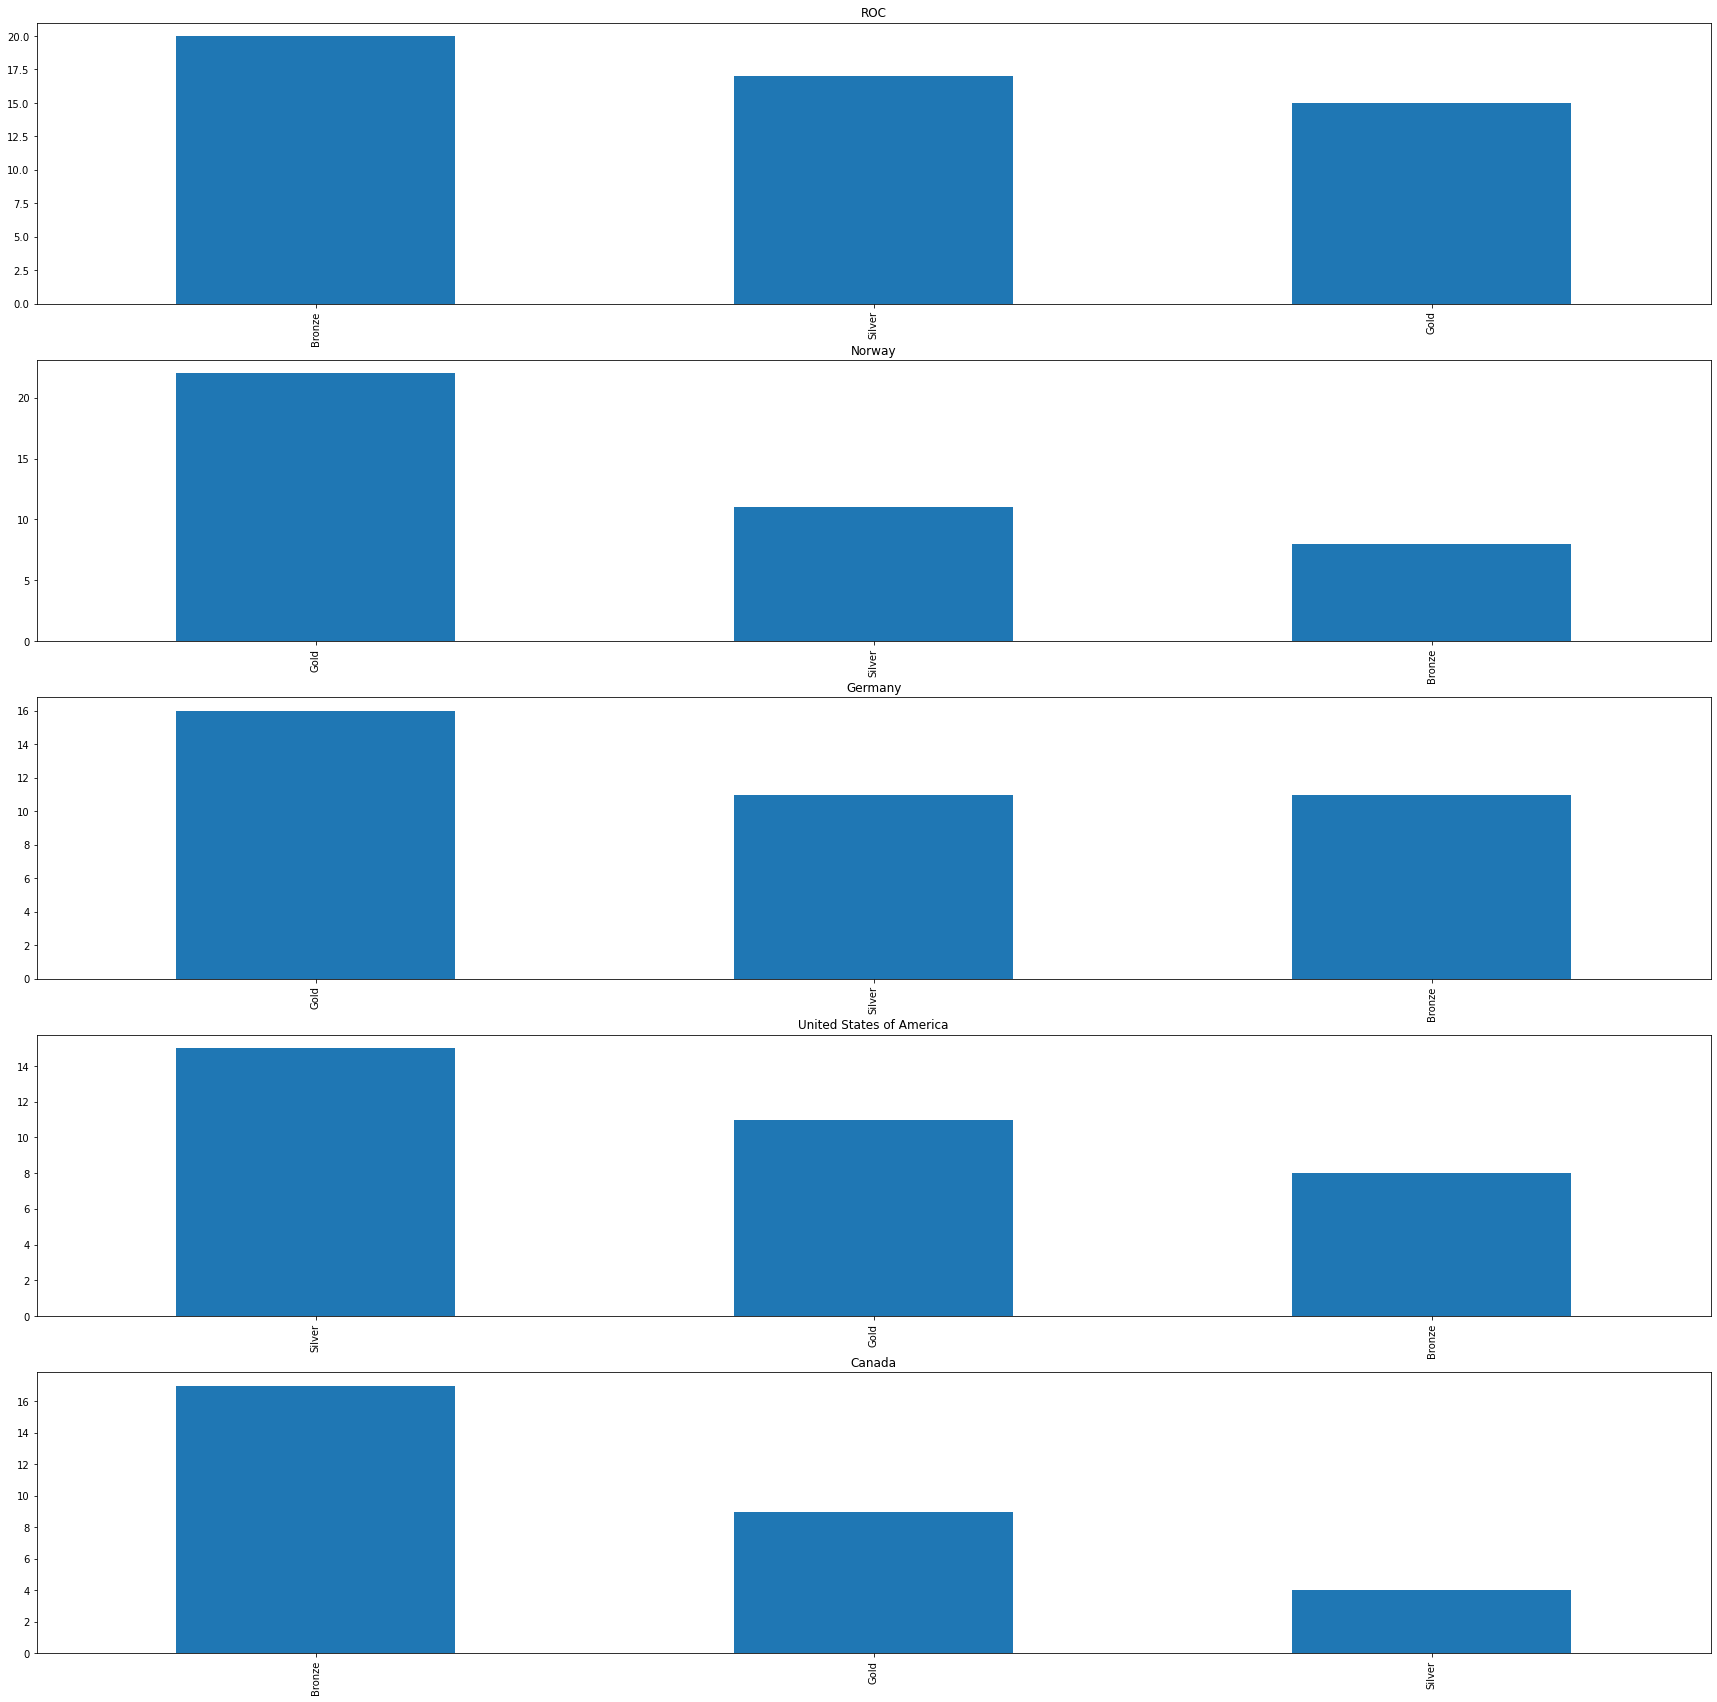

In [126]:
fig, axs = plt.subplots(nrows=len(top5_nome),figsize=(30,30))
for i, stato in enumerate(top5_nome):
    medaglie[(medaglie["country"] == stato)]["medal_type"].value_counts().plot.bar(ax = axs[i], title=stato)
plt.show()

In [127]:
atleti_italiani_discipline = atleti[atleti["residence_country"] == "Italy"]["discipline"].value_counts()
atleti_italiani_discipline

Alpine Skiing                20
Snowboard                    17
Cross-Country Skiing         14
Figure Skating               11
Biathlon                     10
Short Track Speed Skating     9
Luge                          8
Bobsleigh                     8
Speed Skating                 6
Curling                       6
Freestyle Skiing              5
Nordic Combined               4
Ski Jumping                   2
Skeleton                      2
Ice Hockey                    1
Name: discipline, dtype: int64

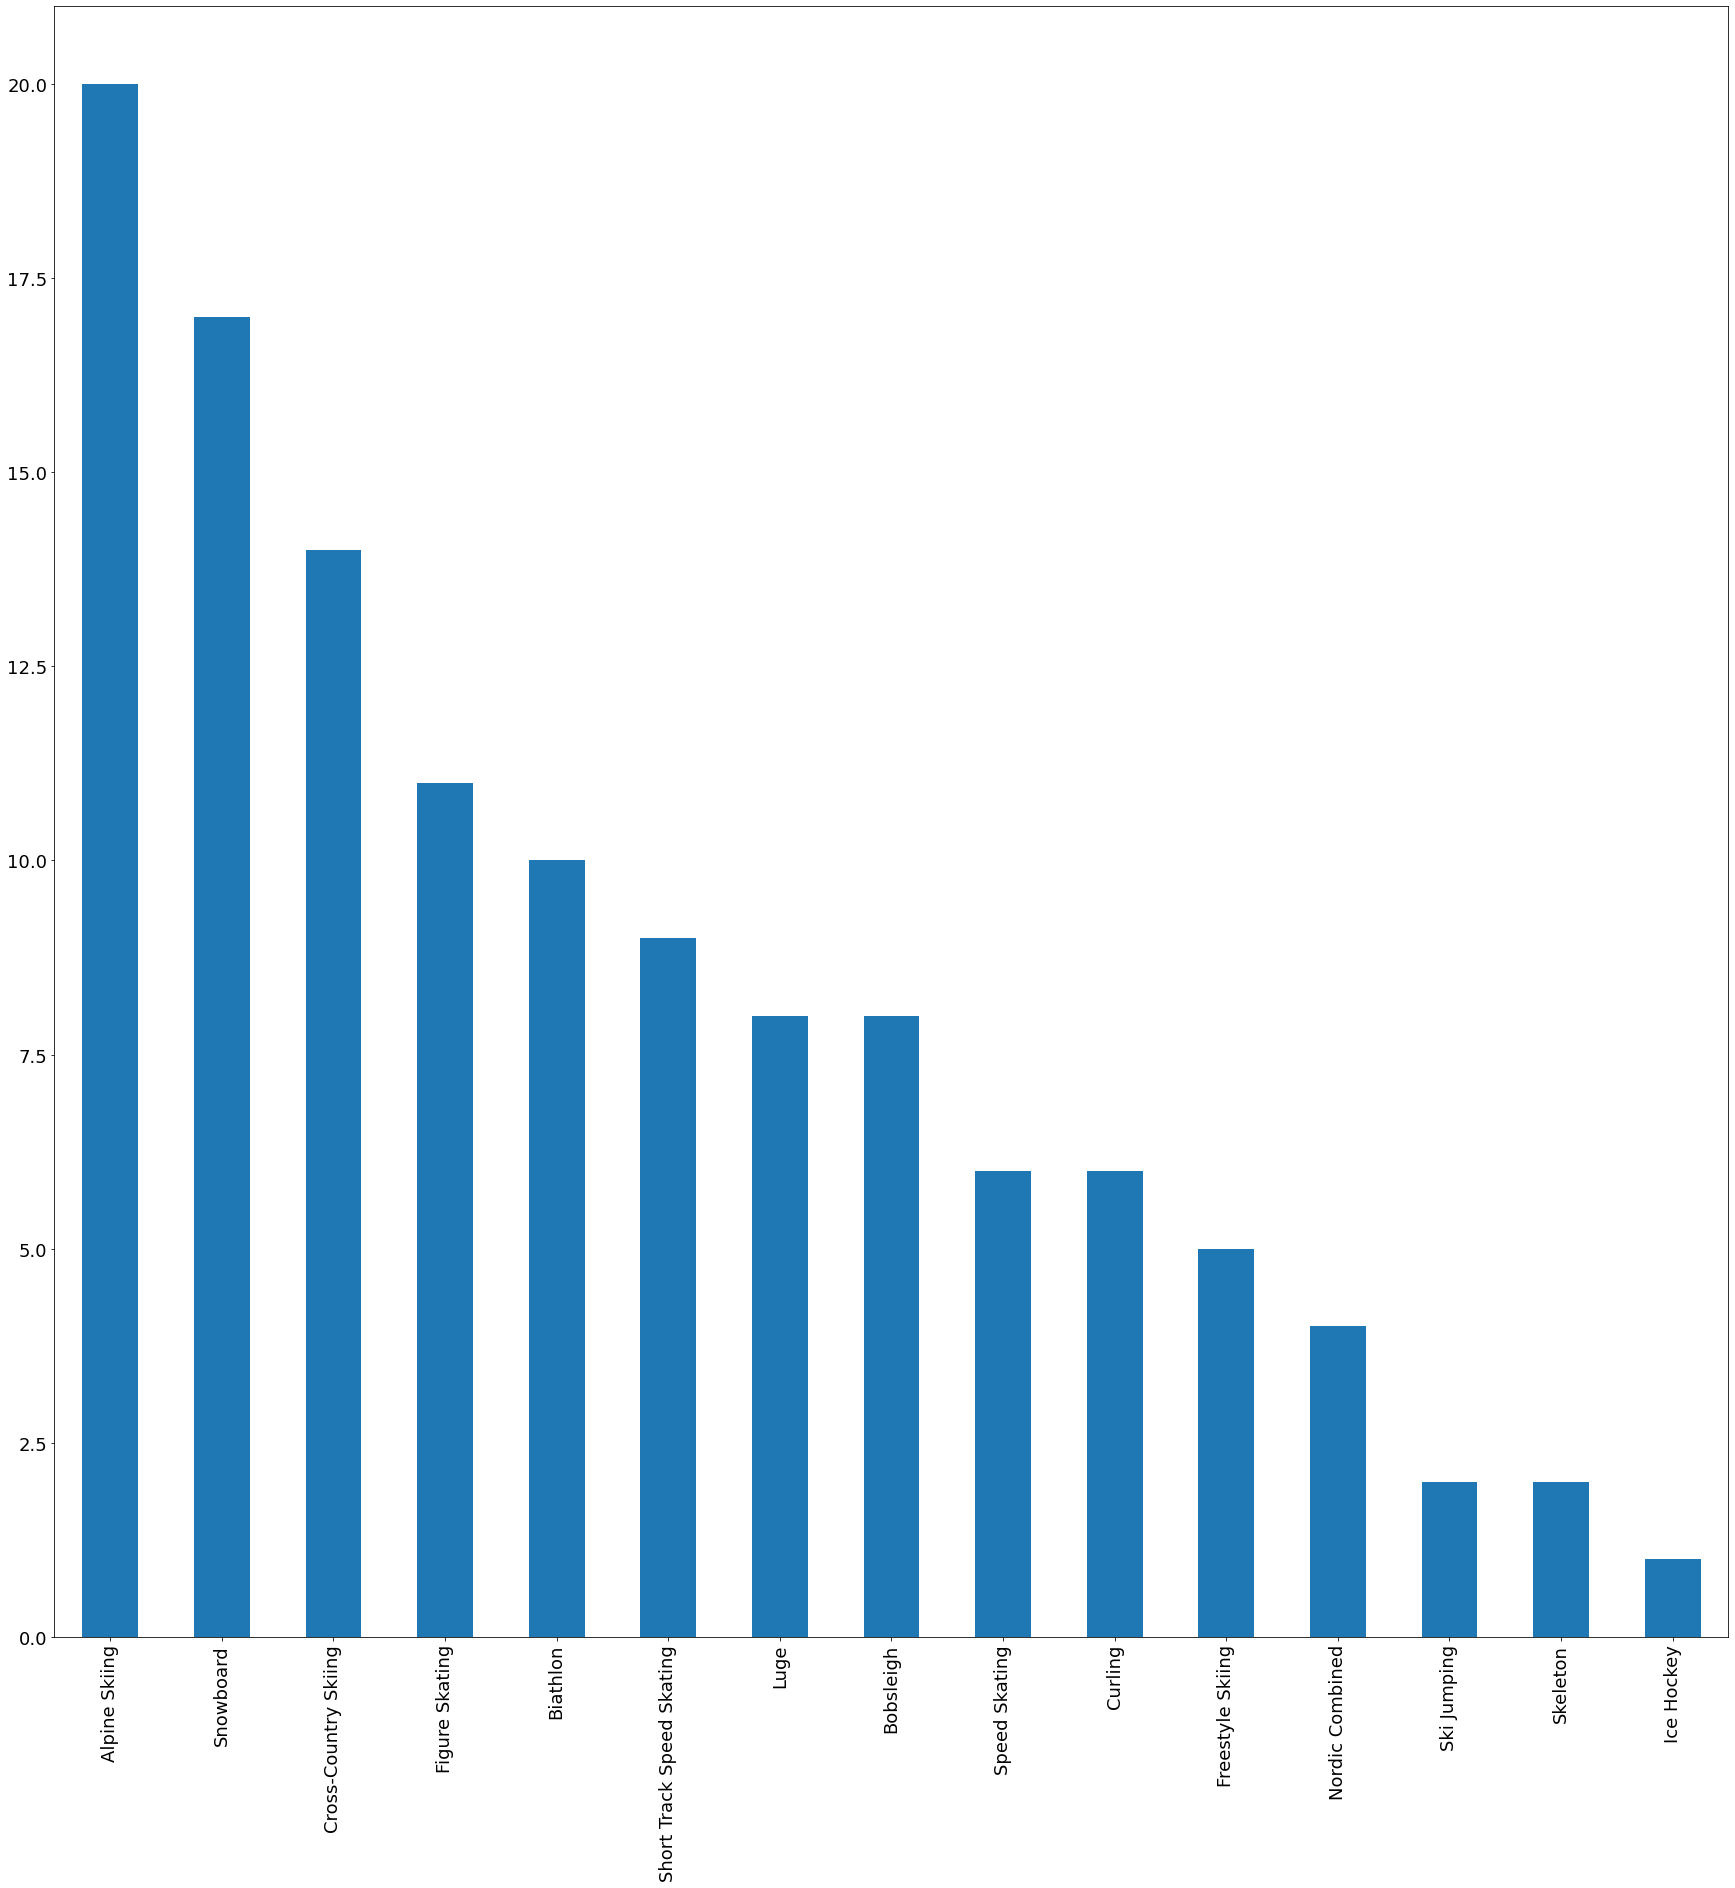

In [175]:
fig, ax = plt.subplots(figsize=(30,30))
atleti_italiani_discipline.plot(kind="bar", ax = ax, fontsize=18)
plt.show()

In [176]:
agg = atleti[["country_code","discipline_code"]].groupby(["country_code","discipline_code"]).size()
agg

country_code  discipline_code
ALB           ALP                 1
AND           ALP                 2
              CCS                 2
              SBD                 1
ARG           ALP                 2
                                 ..
USA           SJP                 5
              SKN                 3
              SSK                12
              STK                 7
UZB           ALP                 1
Length: 442, dtype: int64

In [177]:
agg.to_csv("risultato.csv")

In [178]:
np.sort(atleti[atleti["country"]=="Italy"]["birth_place"].unique().astype(str))

array(['ALZANO LOMBARDO', 'AOSTA', 'ASAGIO', 'ASIAGO', 'BERGAMO',
       'BOLZANO', 'BORMIO', 'BRESSANONE', 'BRESSANONE - BRIXEN',
       'BRESSANONE/BRIXEN', 'BREST', 'BRIXEN', 'BRUNECK', 'BRUNICO',
       'BRUNICO-BRUNECK', 'CASALE MONFERRATO, ALESSANDRIA', 'CAVALESE',
       'CLES', 'COLUMBUS, OH', 'CUNEO', 'FAENZA', 'FELTRE', 'FRASCATI',
       'GENEVA', 'GENOA', 'IVREA', 'MAGENTA', 'MELZO', 'MERANO', 'MILAN',
       'MOENA', 'MONCALIERI', 'MONTREAL, QC', 'MORBEGNO', 'PAVIA',
       'PIEVE DI CADORE', 'POZZA DI FASSA', "REGGIO NELL'EMILIA",
       'RIMINI', 'ROME', 'SAMEDAN', 'SAN DANIELE DEL FRIULI',
       'SAN MARTINO IN BADIA/ST. MARTIN IN THURN',
       'SAN VITO AL TAGLIAMENTO', 'SAPPADA', 'SAVIGLIANO', 'SERIATE',
       'SILANDRO', 'SONDALO', 'SONDRIO', 'TIRANO', 'TOLMEZZO',
       'TREICHVILLE', 'TRENTO', 'TRESCORE', 'TRIESTE', 'TURIN', 'URBINO',
       'VENICE', 'VERCELLI', 'VERONA', 'VICENZA', 'VIPITENO',
       'VIPITENO-STERZING', 'VOELLAN', 'nan'], dtype='<U40')

In [155]:
atleti_nati_milano = atleti[(atleti["country"]=="Italy") & (atleti["birth_place"] == "MILAN")]
atleti_nati_milano

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
252,BRIGNONE Federica,BRIGNONE F,Female,1990-07-14,MILAN,Italy,Italy,ITA,Alpine Skiing,ALP,LA SALLE,Italy,NaN,../../../en/results/alpine-skiing/athlete-prof...
526,DOTTI Tommaso,DOTTI T,Male,1993-07-11,MILAN,Italy,Italy,ITA,Short Track Speed Skating,STK,BORMIO,Italy,NaN,../../../en/results/short-track-speed-skating/...
603,FABBRI Marco,FABBRI M,Male,1988-02-02,MILAN,Italy,Italy,ITA,Figure Skating,FSK,MILAN,Italy,NaN,../../../en/results/figure-skating/athlete-pro...
648,FERRARI Filippo,FERRARI F,Male,1999-12-04,MILAN,Italy,Italy,ITA,Snowboard,SBD,GRAUNO,Italy,NaN,../../../en/results/snowboard/athlete-profile-...
2189,SALA Tommaso,SALA T,Male,1995-09-06,MILAN,Italy,Italy,ITA,Alpine Skiing,ALP,VALDISOTTO,Italy,NaN,../../../en/results/alpine-skiing/athlete-prof...


In [133]:
elenco_short_nomi = atleti_nati_milano["short_name"].values
elenco_short_nomi

array(['BRIGNONE F', 'DOTTI T', 'FABBRI M', 'FERRARI F', 'SALA T'],
      dtype=object)

In [134]:
medaglie[medaglie["athlete_short_name"].isin(elenco_short_nomi)]["athlete_name"].unique()

array(['BRIGNONE Federica', 'DOTTI Tommaso'], dtype=object)

# Esercizio 3: i dati di Netflix
Il file `Netflix-Dataset-Latest-2021.xlsx` contiene svariati dati di film e serie Netflix.

1) In media hanno uno score maggiore (`IMDb Score`) i film/serie che durano meno di 30 minuti oppure quelli che durano più di 2h?

2) Utilizza matplotlib creare un grafico a dispersione che mostri la correlazione tra `IMDb Score` e `Awards Received`. I punti del grafico devono avere un colore che dipenda dal numero di voti ricevuti `IMDb Votes`. I grafici devono avere titolo, griglia ed etichette sugli assi.

3) **BONUS**: traccia lo stesso grafico facendo in modo che la dimensione dei punti sia proporzionale al numero di voti `IMDb Votes`.

In [135]:
netflix = pd.read_excel("Netflix-Dataset-Latest-2021.xlsx")
netflix

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa",...,https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube,NaN,NaN
9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,...,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube,NaN,NaN
9422,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,Amos Gitai,NaN,...,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtube.com/watch?v=RnGRdaX594k,YouTube,NaN,NaN
9423,Daniel Are

In [136]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9266 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [137]:
tipi_durate = netflix["Runtime"].unique()
tipi_durate

array(['< 30 minutes', '1-2 hour', '> 2 hrs', '30-60 mins', nan],
      dtype=object)

In [138]:
media_score_film_30m = netflix[netflix["Runtime"]=="< 30 minutes"]["IMDb Score"].mean()
media_score_film_30m

7.5257678500199505

In [139]:
media_score_film_2h = netflix[netflix["Runtime"]=="> 2 hrs"]["IMDb Score"].mean()
media_score_film_2h

7.107239819004543

In [140]:
# Hanno uno score maggiore i film/serie che durano meno di 30 minuti

In [141]:
correlazione = netflix[["IMDb Score","Awards Received","IMDb Votes"]]
correlazione

,IMDb Score,Awards Received,IMDb Votes
0,7.9,74.0,205926.0
1,5.8,1.0,2838.0
2,7.4,NaN,131.0
3,7.5,2.0,47.0
4,6.7,2.0,88.0
...,...,...,...
9420,6.2,NaN,167842.0
9421,6.2,1.0,878.0
9422,7.3,NaN,14.0
9423,7.8,NaN,174.0


In [142]:
correlazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb Score       9417 non-null   float64
 1   Awards Received  5226 non-null   float64
 2   IMDb Votes       9415 non-null   float64
dtypes: float64(3)
memory usage: 221.0 KB


In [143]:
correlazione.dropna(inplace=True)

<ipython-input-143-a904fe5d7317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlazione.dropna(inplace=True)


In [144]:
correlazione.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5226 entries, 0 to 9421
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb Score       5226 non-null   float64
 1   Awards Received  5226 non-null   float64
 2   IMDb Votes       5226 non-null   float64
dtypes: float64(3)
memory usage: 163.3 KB


In [165]:
voti = correlazione["IMDb Votes"].values
voti

array([2.05926e+05, 2.83800e+03, 4.70000e+01, ..., 1.03700e+04,
       4.04250e+04, 8.78000e+02])

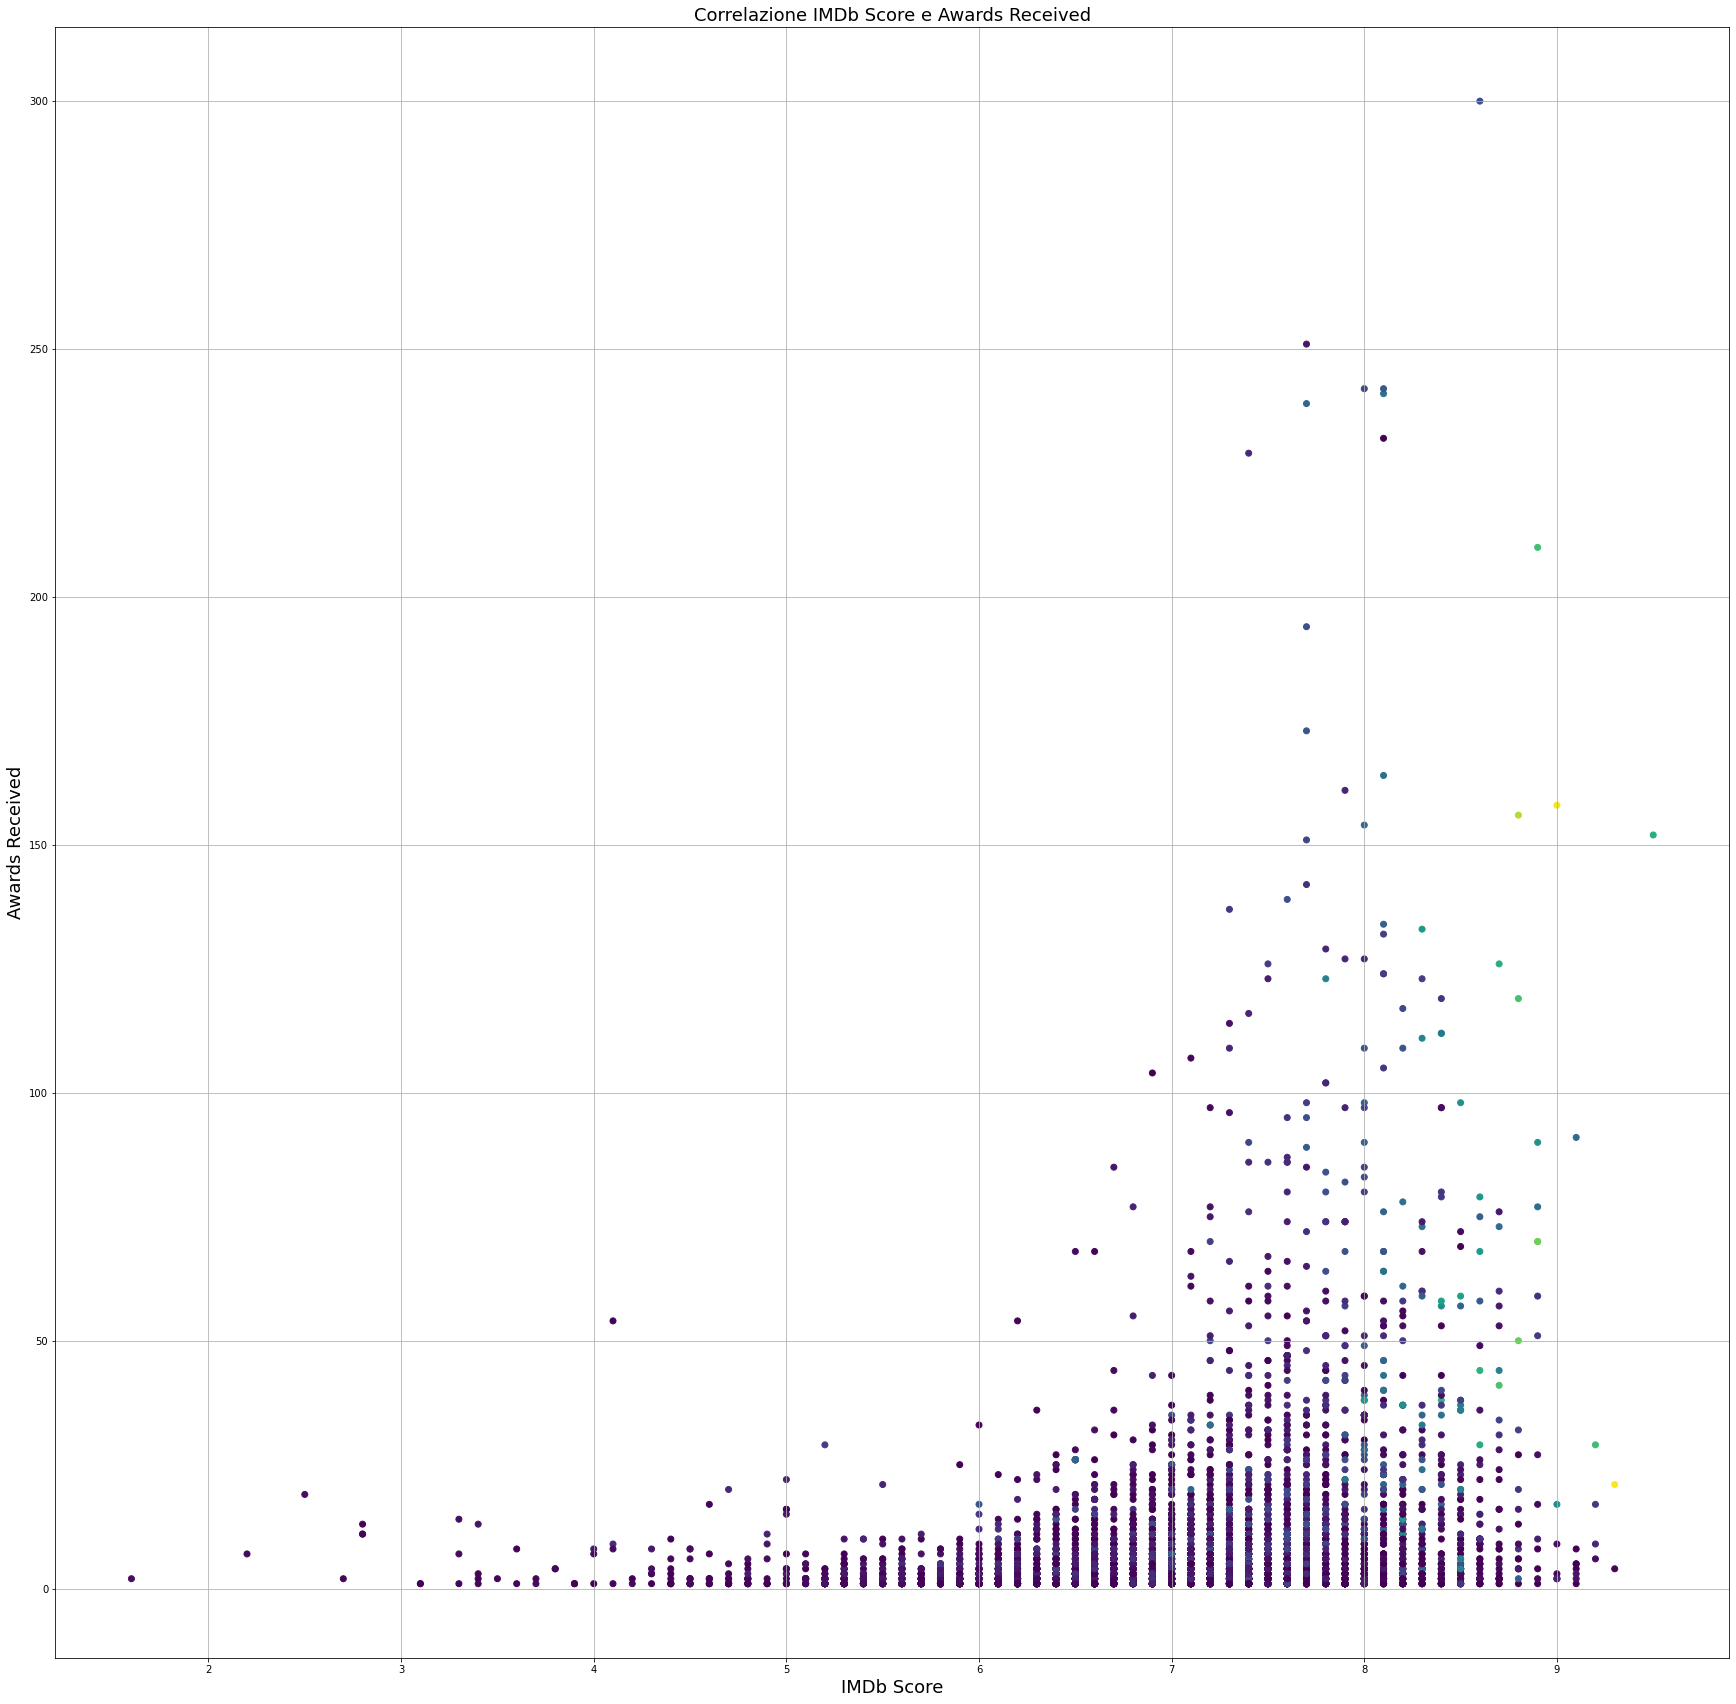

In [166]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(correlazione["IMDb Score"].values,correlazione["Awards Received"].values,c=voti,marker="o")
ax.set_title("Correlazione IMDb Score e Awards Received", fontsize=18)
ax.set_xlabel("IMDb Score", fontsize=18)
ax.set_ylabel("Awards Received", fontsize=18)
ax.grid()
plt.show()

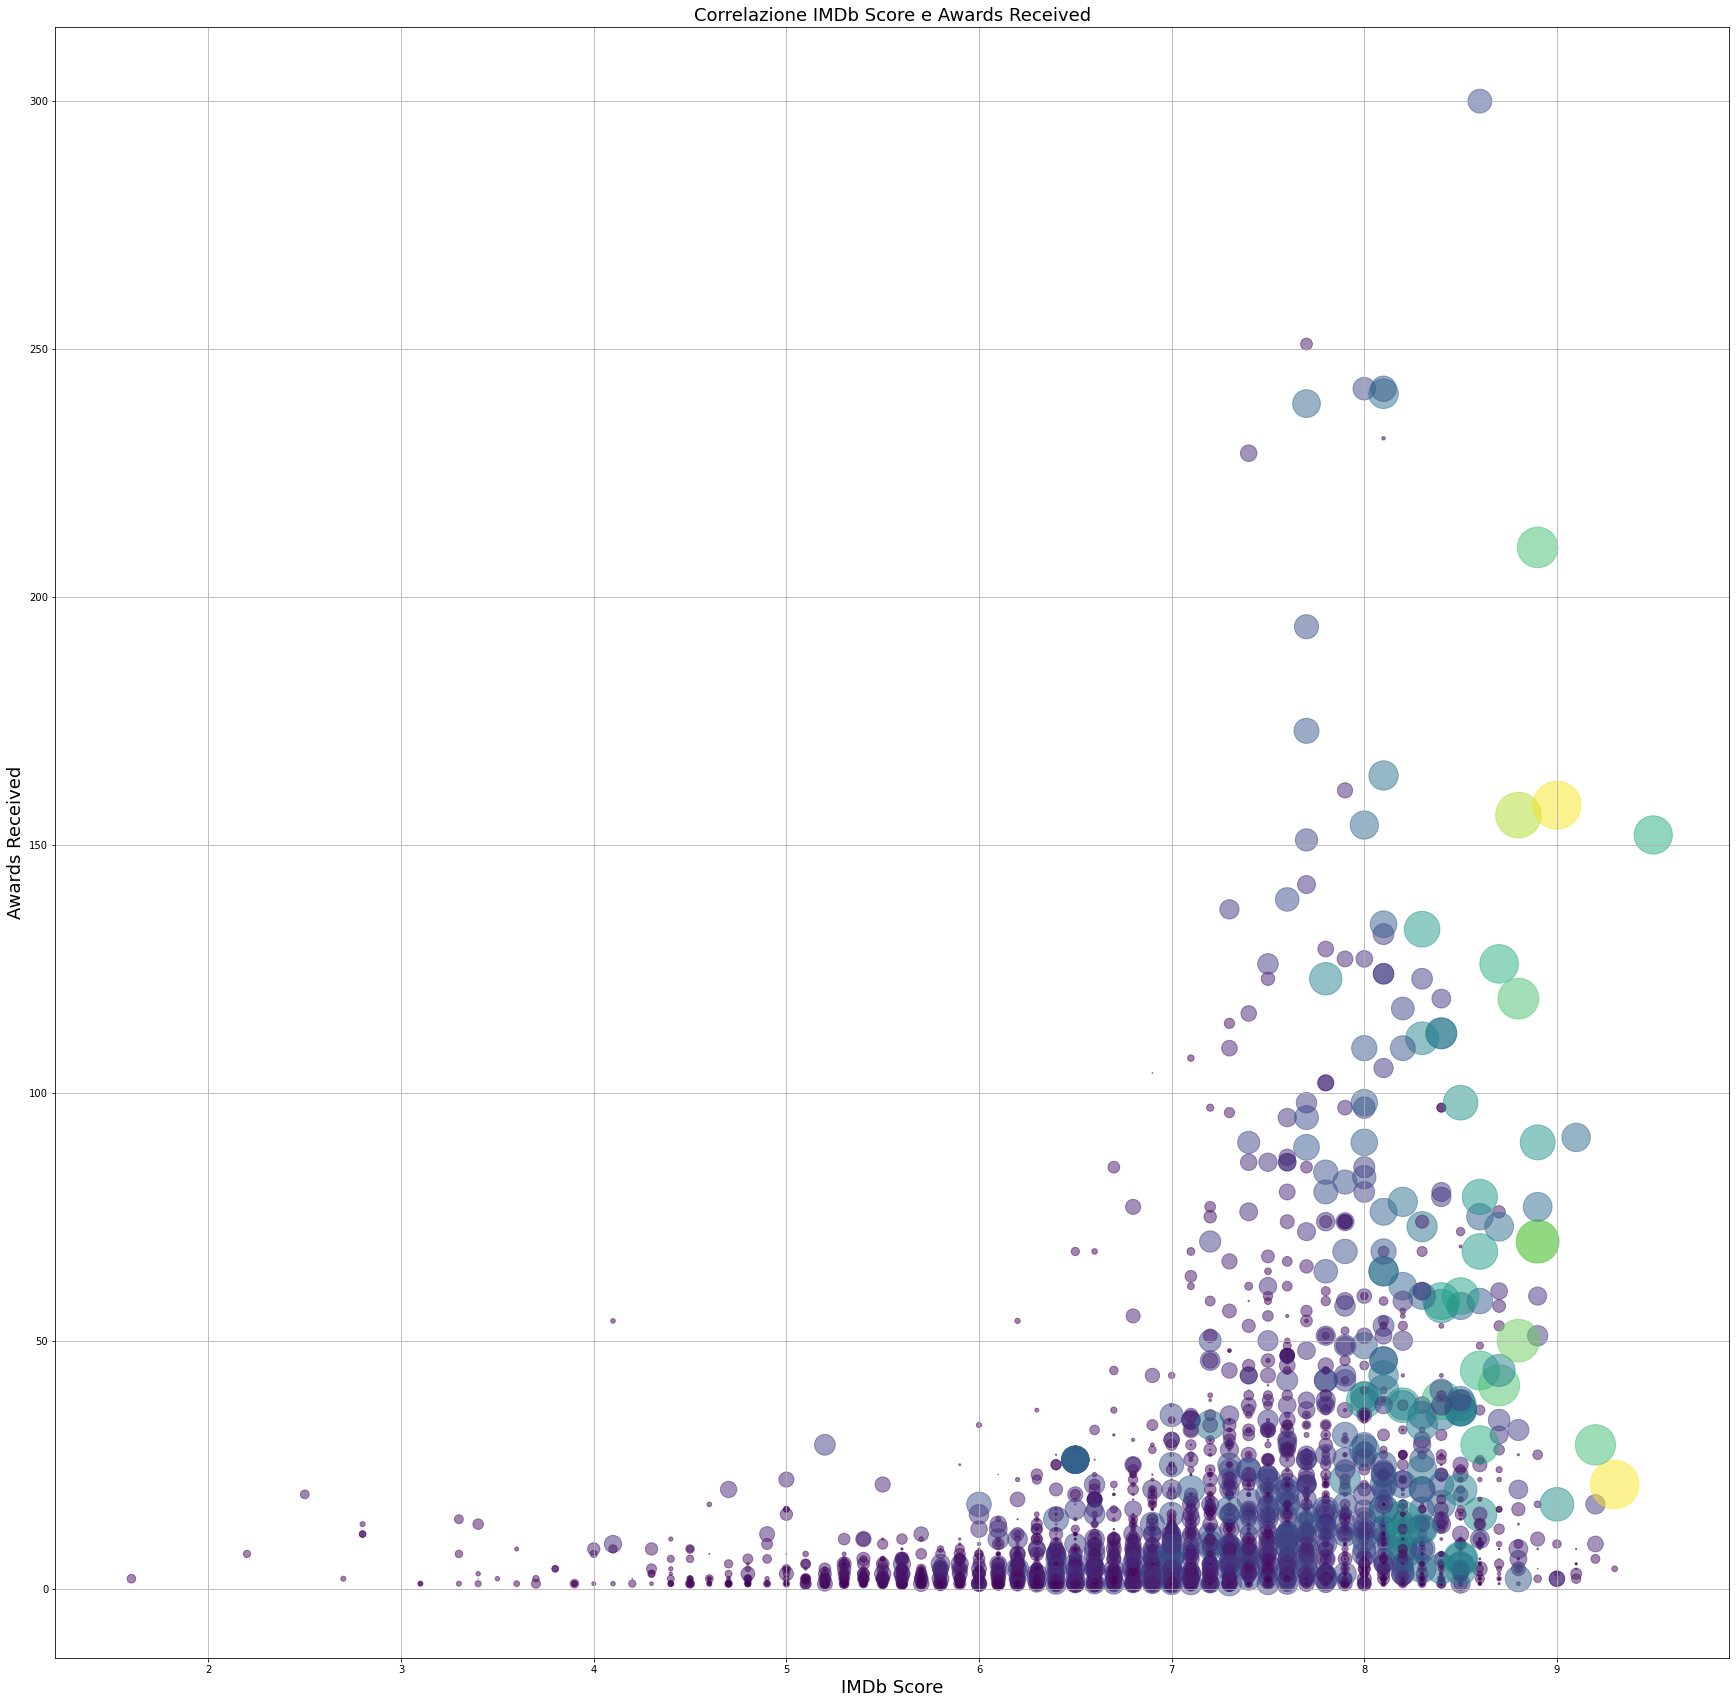

In [173]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(correlazione["IMDb Score"].values,correlazione["Awards Received"].values,c=voti,marker="o",s=voti/1000,alpha=0.5)
ax.set_title("Correlazione IMDb Score e Awards Received", fontsize=18)
ax.set_xlabel("IMDb Score", fontsize=18)
ax.set_ylabel("Awards Received", fontsize=18)
ax.grid()
plt.show()